## Data Wraggling

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

In [10]:
OUTPUT_FOLDER = Path("output")
data_df = pd.read_csv(OUTPUT_FOLDER / "data.csv")
data_df = data_df.iloc[:, 2:]
data_df

,city,state,zip,region,_gradeWalking,avgDaysOfEnjoyableWeather,avgInternetSpeed,avgPopulationDensity,percentDemocrat,percentGraduates,...,percentReligious,percentRepublican,percentSingle,avgHomePrice,avgCostOfLiving,gradeAirQuality,gradeLowTraffic,gradeSafety,lat,lon
0,Palo Alto,CA,94303,West,54.0,153,45,4404,0.70,0.78,...,0.43,0.28,0.42,2187500,31575,3.25,3.75,4.00,37.441883,-122.143020
1,Naples,FL,34116,South,34.0,97,41,485,0.35,0.49,...,0.37,0.65,0.38,308500,19282,3.75,5.25,3.25,26.142036,-81.794810
2,Seattle,WA,98115,West,70.8,83,54,5841,0.69,0.58,...,0.37,0.29,0.60,579975,28018,5.00,2.25,1.00,47.606209,-122.332071
3,Santa Fe,NM,87507,West,36.0,47,48,213,0.74,0.43,...,0.49,0.22,0.60,369000,20840,5.25,5.00,2.25,35.686975,-105.937799
4,Austin,TX,78745,South,35.4,61,83,1807,0.60,0.45,...,0.46,0.36,0.60,350000,20082,3.00,3.00,2.00,30.267153,-97.743061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Victorville,CA,92392,West,17.0,58,43,1597,0.52,0.12,...,0.42,0.46,0.54,212000,23155,1.00,1.00,2.75,34.536218,-117.292764
482,Perris,CA,92570,West,21.0,56,52,886,0.49,0.07,...,0.43,0.49,0.55,276000,20650,1.00,1.00,3.25,33.782519,-117.228648
483,Homestead,FL,33033,South,35.0,68,36,413,0.62,0.17,...,0.40,0.38,0.59,202500,23702,4.75,1.00,1.00,25.468722,-80.477557
484,Hesperia,CA,92345,West,13.0,59,34,825,0.52,0.10,...,0.42,0.46,0.55,236000,23576,1.00,1.00,3.25,34.426389,-117.300878


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = [[*row.to_numpy()]  for i, row in data_df.iloc[:,3:-2].iterrows()]
V = scaler.fit_transform(X)
data_df.iloc[:,3:-2] = V
data_df

,city,state,region,percentDemocrat,percentGraduates,percentIndependent,percentNonReligious,percentReligious,percentRepublican,percentSingle,avgHomePrice,avgCostOfLiving,gradeAirQuality,gradeLowTraffic,gradeSafety,lat,lon
0,Palo Alto,CA,West,1.141435,3.481012,0.469429,0.418756,-0.419308,-1.168978,-1.697099,9.047523,1.905781,0.189623,0.533896,1.209325,37.441883,-122.143020
1,Naples,FL,South,-1.364154,1.355210,-0.904923,0.932035,-0.932186,1.474121,-2.183414,0.150341,-0.737170,0.540028,1.583686,0.549199,26.142036,-81.794810
2,Seattle,WA,West,1.069847,2.014942,0.469429,0.932035,-0.932186,-1.097543,0.491318,1.435792,1.141039,1.416041,-0.515895,-1.431178,47.606209,-122.332071
3,Santa Fe,NM,West,1.427788,0.915389,3.218132,-0.094524,0.093570,-1.597589,0.491318,0.436812,-0.402205,1.591243,1.408721,-0.330968,35.686975,-105.937799
4,Austin,TX,South,0.425552,1.061996,3.218132,0.162116,-0.162869,-0.597497,0.491318,0.346846,-0.565172,0.014420,0.009000,-0.551010,30.267153,-97.743061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Victorville,CA,West,-0.147154,-1.357020,0.469429,0.504302,-0.504787,0.116854,-0.238154,-0.306593,0.095511,-1.387201,-1.390721,0.109115,34.536218,-117.292764
482,Perris,CA,West,-0.361918,-1.723538,0.469429,0.418756,-0.419308,0.331159,-0.116576,-0.003549,-0.443055,-1.387201,-1.390721,0.549199,33.782519,-117.228648
483,Homestead,FL,South,0.568729,-0.990503,-0.904923,0.675395,-0.675747,-0.454627,0.369739,-0.351576,0.213115,1.240838,-1.390721,-1.431178,25.468722,-80.477557
484,Hesperia,CA,West,-0.147154,-1.503627,0.469429,0.504302,-0.504787,0.116854,-0.116576,-0.192951,0.186025,-1.387201,-1.390721,0.549199,34.426389,-117.300878


----

In [4]:
from sklearn.cluster import KMeans
X = [[*row.to_numpy()]  for i, row in data_df.iloc[:,3:-2].iterrows()]
clustering = KMeans(
    n_clusters=3,
    random_state=0).fit(X)

In [5]:
data_df["group"] = data_df.apply(lambda x: clustering.predict([[*x.to_numpy()[3:-2]]])[0], axis=1)
data_df

,city,state,region,percentDemocrat,percentGraduates,percentIndependent,percentNonReligious,percentReligious,percentRepublican,percentSingle,avgHomePrice,avgCostOfLiving,gradeAirQuality,gradeLowTraffic,gradeSafety,lat,lon,group
0,Palo Alto,CA,West,1.141435,3.481012,0.469429,0.418756,-0.419308,-1.168978,-1.697099,9.047523,1.905781,0.189623,0.533896,1.209325,37.441883,-122.143020,0
1,Naples,FL,South,-1.364154,1.355210,-0.904923,0.932035,-0.932186,1.474121,-2.183414,0.150341,-0.737170,0.540028,1.583686,0.549199,26.142036,-81.794810,2
2,Seattle,WA,West,1.069847,2.014942,0.469429,0.932035,-0.932186,-1.097543,0.491318,1.435792,1.141039,1.416041,-0.515895,-1.431178,47.606209,-122.332071,0
3,Santa Fe,NM,West,1.427788,0.915389,3.218132,-0.094524,0.093570,-1.597589,0.491318,0.436812,-0.402205,1.591243,1.408721,-0.330968,35.686975,-105.937799,0
4,Austin,TX,South,0.425552,1.061996,3.218132,0.162116,-0.162869,-0.597497,0.491318,0.346846,-0.565172,0.014420,0.009000,-0.551010,30.267153,-97.743061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Victorville,CA,West,-0.147154,-1.357020,0.469429,0.504302,-0.504787,0.116854,-0.238154,-0.306593,0.095511,-1.387201,-1.390721,0.109115,34.536218,-117.292764,2
482,Perris,CA,West,-0.361918,-1.723538,0.469429,0.418756,-0.419308,0.331159,-0.116576,-0.003549,-0.443055,-1.387201,-1.390721,0.549199,33.782519,-117.228648,2
483,Homestead,FL,South,0.568729,-0.990503,-0.904923,0.675395,-0.675747,-0.454627,0.369739,-0.351576,0.213115,1.240838,-1.390721,-1.431178,25.468722,-80.477557,1
484,Hesperia,CA,West,-0.147154,-1.503627,0.469429,0.504302,-0.504787,0.116854,-0.116576,-0.192951,0.186025,-1.387201,-1.390721,0.549199,34.426389,-117.300878,2


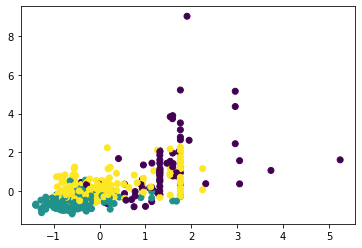

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data_df["avgCostOfLiving"], data_df["avgHomePrice"], c=data_df["group"])
plt.show()

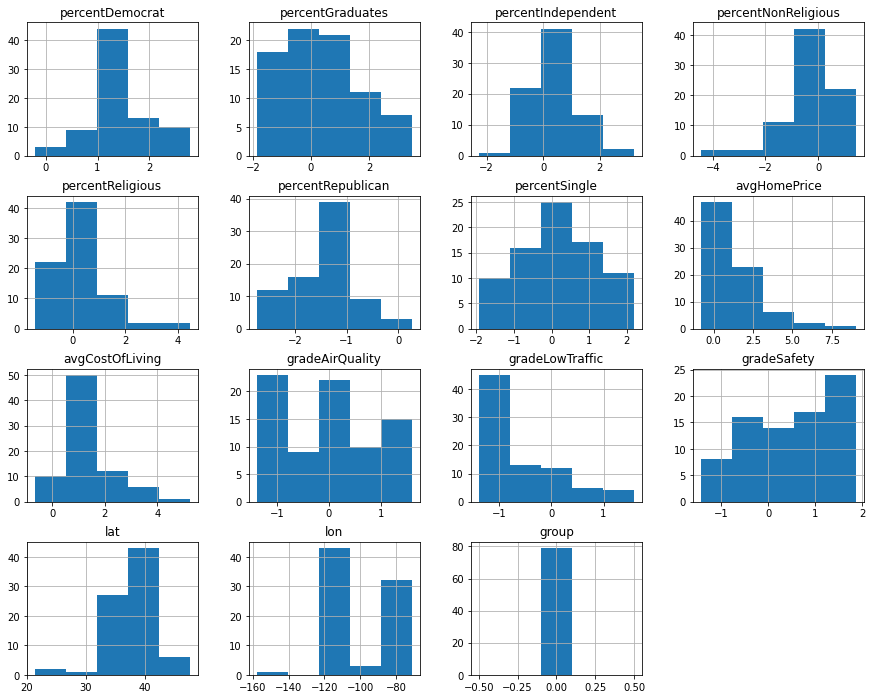

In [7]:
x = data_df[data_df["group"] == 0].hist(bins=5, figsize=(15,12))

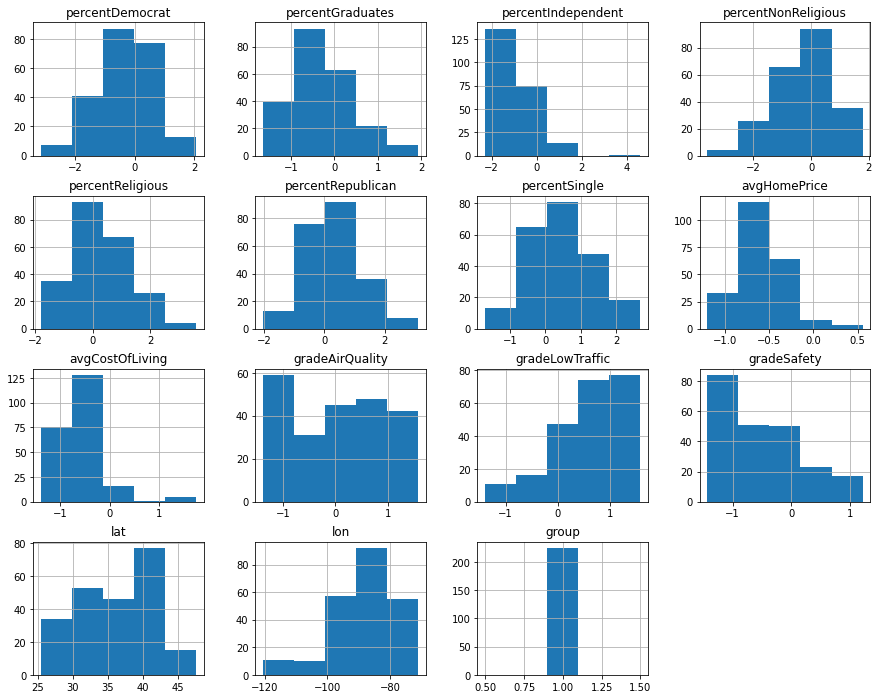

In [8]:
x = data_df[data_df["group"] == 1].hist(bins=5, figsize=(15,12))

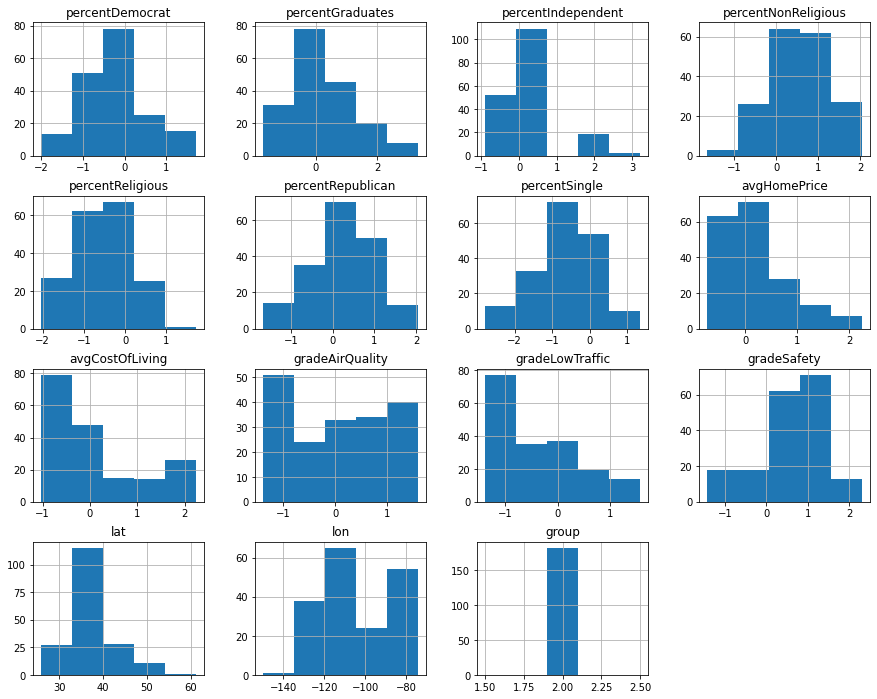

In [9]:
x = data_df[data_df["group"] == 2].hist(bins=5, figsize=(15,12))